# Introduction aux statistiques

Objectifs du cours:
- Connaitre les prinicipaux concepts statistiques (probabilités, satistiques descriptives, statistiques prédictives)
- Appliquer les prinicipaux concepts statistiques de base à un dataset
- Connaitre les principaux bias liés aux statistiques
- Demontrer un regard critiques sur résultats de. statistiques

## Partie 0 - Charger le dataset

In [2]:
import pandas as pd

In [3]:
titanic_dataset = pd.read_csv("train.csv")
titanic_dataset

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


## Partie 1 - Exemples

### Probabilités

La **probabilité** est la mesure de la possibilité qu'un événement se produise dans une expérience aléatoire.

Mais qu'est ce qu'une **expérience aléatoire** ? 

Une expérience aléatoire est une expérience dont on ne peut pas prévoir le résultat de façon certaine.

On considère donc que le naufrage du Titanic est une expérience aléatoire. 

La probabilité d'un événement peut donc se mesurer comme le nombre d'issues favorables divisé par le nombre total d'issues possibles.

La probabilité de survivre le titanic est donc: le nombre de survivants / le nombre total de personnes à bord. Soit P(Survivre):

In [19]:
p_survived = titanic_dataset["Survived"].value_counts()[1]/titanic_dataset["Survived"].count()
p_survived

0.3838383838383838

La probabilité d'être une femme, P(Femme), est: 

In [32]:
p_woman= titanic_dataset[titanic_dataset["Sex"]=="female"]["Sex"].count()/titanic_dataset["Sex"].count()
p_woman

0.35241301907968575

La probabilité d'être une femme **et** de survivre est, P(survivre ∩ Femme):  

In [45]:
p_woman_and_survived = len(titanic_dataset[(titanic_dataset["Sex"]=="female") &(titanic_dataset["Survived"]==1)])/len(titanic_dataset)
p_woman_and_survived

0.2615039281705948

La **probabilité conditionelle** est une mesure de la probabilité qu'un événement se produise, avec une certaine relation, avec un ou plusieurs autres événements. 

Par exemple la probabilité de survivre le titantic sachant qu'on est une femme est:P(survivre | Femme) = P(survivre ∩ Femme) / P(Femme). Soit:  

In [50]:
p_survied_knowing_woman = p_woman_and_survived / p_woman
p_survied_knowing_woman

0.7420382165605095

Et la probabilté d'être une femme sachant qu'on a survecu le titanic est: P(Femme | Survivre) = P(Survivre ∩ Femme) / P(Survivre). Soit:   

In [51]:
p_woman_knowing_survived = p_woman_and_survived / p_survived
p_woman_knowing_survived

0.6812865497076023

Il est également important de comprendre la notion d'évenements indépendants ainsi que la notions d'évènements exclusifs. 


Deux événements sont **indépendants** si l'occurrence de l'un n'affecte pas la probabilité d'occurrence de l'autre. Cela implique que P(A∩B)=P(A)P(B), P(A|B)=P(A) et P(B|A)=P(B) 

Deux événements sont mutuellement **exclusifs** s'ils ne peuvent pas se produire tous les deux en même temps. P(A∩B)=0 et P(A∪B)=P(A)+P(B).

**Exercice**:
- Est ce que l'évenement être une femme ainsi que l'évènement survivre sont indépendants dans l'expérience du titanic ?
- Est ce que l'évenement être une femme ainsi que l'évènement survivre sont exclusifs dans l'expérience du titanic ?
- Quelle est la probabilité d'être un homme ? 
- Quelle est la probabilité de mourrir ? 
- Quelle est la probabilité de mourrir  sachant que nous somme un homme ?
- Quelle est la probabilité d'être une femme sachant que nous voyagons en 1e classe ? 
- Quelle est la probabilité d'avoir été en 3e classe sachant que nous sommes n'avons pas survécu? 

### Statistiques descriptives

Un échantillon N'EST PAS EGAL à la population !

<img src="pop.png" alt="Drawing" style="width: 400px;"/>

**Moyenne** : La moyenne de l'ensemble des données.  
**Médiane** : La valeur moyenne d'un ensemble de données ordonnées.  
**Mode** : La valeur la plus fréquente dans l'ensemble de données.

![title](median.png)

In [59]:
titanic_dataset["Age"].mean()

29.69911764705882

In [60]:
titanic_dataset["Age"].median()

28.0

In [61]:
titanic_dataset["Age"].mode()

0    24.0
dtype: float64

**Plage:** La différence entre la valeur la plus élevée et la plus basse de l'ensemble de données.  
**Percentiles:** Une mesure qui indique la valeur en dessous de laquelle se situe un pourcentage donné d'observations dans un groupe d'observations.  
**Quantiles:** Valeurs qui divisent le nombre de points de données en quatre parties plus ou moins égales, ou quarts.  
**Intervalle interquartile (IQR):** Mesure de la dispersion et de la variabilité statistiques basée sur la division d'un ensemble de données en quartiles. IQR = Q3-Q1  
**Variance:** La différence moyenne au carré des valeurs par rapport à la moyenne pour mesurer la dispersion d'un ensemble de données par rapport à la moyenne.  
**Écart-type:** La différence standard entre chaque point de données et la moyenne et la racine carrée de la variance.  
**Valeur aberante** (*Outlier*): Une valeur aberrante est une observation qui se situe à une distance anormale des autres valeurs dans un échantillon aléatoire d'une population. Nous considérons qu'une valeur est abbérante si elle est plus petite que  Q1 - 1.5 IQR ou plus grande que Q3 + 1.5IQR   

![title](boxplot.png)

In [72]:
print("Plage: ", titanic_dataset["Age"].max()- titanic_dataset["Age"].min())

Plage:  79.58


In [87]:
print("Percentile:",titanic_dataset["Age"].quantile(0.1))

Percentile: 14.0


In [88]:
print("Quantile 1:",titanic_dataset["Age"].quantile(0.25))
print("Quantile 2:",titanic_dataset["Age"].quantile(0.5))
print("Quantile 3:",titanic_dataset["Age"].quantile(0.75))

Quantile 1: 20.125
Quantile 2: 28.0
Quantile 3: 38.0


In [89]:
print("Intervalle interquartile (IQR): ", titanic_dataset["Age"].quantile(0.75) - titanic_dataset["Age"].quantile(0.25))

Intervalle interquartile (IQR):  17.875


In [90]:
print("Variance:", titanic_dataset["Age"].var())

variance: 211.01912474630802


In [94]:
print("Écart-type:", titanic_dataset["Age"].std())

Écart-type: 14.526497332334042


<AxesSubplot:>

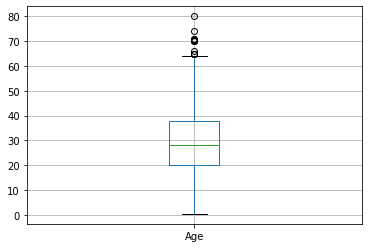

In [93]:
titanic_dataset.boxplot(column='Age')

**Distribution normale/gaussienne** : La courbe de la distribution est en forme de cloche et symétrique. 

![title](normal.png)

<AxesSubplot:ylabel='Frequency'>

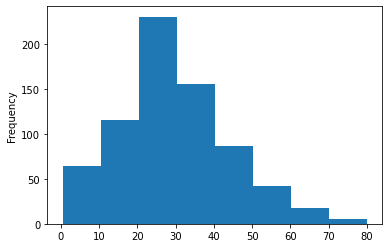

In [96]:
titanic_dataset.Age.plot.hist(bins=8)

**Exercices:**
- Quelles sont la moyenne, la médiane, la mode des prix du ticket du titanic ?
- Quelle est la plage, Q1, Q2, Q3, IQR et l'écart type des prix du ticket du titanic ?
- Y a t'il des valeur aberrantes dans les prix du ticket du titanic ? Combien ? Avez vous une explication pour ces valeurs abérrantes ?
- Affichez un boxplot des prix du ticket du titanic ?
- Est ce que les prix du ticket suivent une distribution normale ?
- Grâce à vos propres recherches déterminez si l'echantillon du titanic est représentative de la population britsih de l'époque ?

In [ ]:
# A vous de jouer ! 

### Statsitiques prédicitives

**Causalité:** Relation entre deux événements où un événement est affecté par l'autre.   
**Corrélation:** Mesure quantitative de la variabilité conjointe entre deux ou plusieurs variables. Elle se situe entre -1 à 1.

![title](corr.png)

![title](corrr.png)

Nous pouvons voir la distributions de nos points avec le graphe suivant

<AxesSubplot:xlabel='Age', ylabel='Fare'>

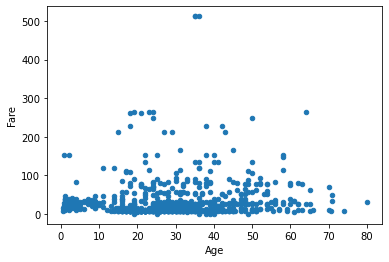

In [85]:
titanic_dataset.plot.scatter(x= 'Age', y='Fare')

A votre avis le coefficent de correlation sera autour de quelle valeur ?

In [98]:
titanic_dataset['Age'].corr(titanic_dataset['Fare'], method ='pearson' )

0.09606669176903887

**Mais attention correlation n'est PAS FORCEMENT EGAL à causalité !!!**

Comme vous pouvez le voir sur le site suivant: https://www.tylervigen.com/spurious-correlations

![title](corrimg.png)

## Partie 2 - Les bias en statistics et comment manipuler des données

Sur le titanic les femmes adultes et les enfants avaient les meilleures chances de survie. En revacnhe ce n'était pas le cas pour les hommes. En effet à partir des données, nous pourrions dire que :

Moins d'un homme sur cinq, sur le Titanic, a survécu.

Presque 4 femmes sur 5, sur le Titanic, ont survécu.

Est ce que nous pourrions également dire que les femmes avaient 4 fois plus de chance de suirvivre que les hommes ?

Cette dernière affirmation est relative et donc beaucoup plus trompeuse que les deux premières qui sont absolues. Car si le taux de survie des femmes était 4 fois supérieur à celui des hommes, cela pourrait signifier soit :

.01% - taux de survie des hommes  
0,04% - taux de survie des femmes   

ou

20% - taux de survie des hommes  
80% - taux de survie des femmes  


"Politicians use statistics in the same way that a drunk uses lamp-posts—for support rather than illumination" – Andrew Lang (WikiQuote) 

Je vous invite donc à lire les 2 articles suivants et à regarder la vidéo pour avoir une idée plus précise d'exemples de biais et de manipulations en statistiques:
- https://towardsdatascience.com/lessons-from-how-to-lie-with-statistics-57060c0d2f19
- https://www.statisticshowto.com/statistics-basics/fake-statistics/
- https://www.youtube.com/watch?v=sxYrzzy3cq8

**Questions:**
- Quel exemple vous a le plus marqué ? 
- Avez vous déjà été confronté à un exemple similaire dans votre vie ?

## Partie 3 - A vous de manipuler les données 😈 !!

Choisissez un des datasets avec lequel nous avons travaillé dans les cours précédents et essayez de faire l'affirmation la plus choquante grâce à votre analyse statistique !      

Pour cela préparez une slide avec votre affiramtion choquante et un graphique supportant votre affirmation et préparez une deuxième slide avec la manière correcte de présenter vos données. 
Vous deverez donc expliquer en quoi cette  affiramtion est fausse, quel type de biais est mis en jeu et quelle serait la manière correcte de présenter les informations.

Chaqun présentera sa slide et on votera pour la plus choquante et convainquante !  